In [3]:
import os
import pandas as pd
import librosa
import matplotlib.pyplot as plt


In [37]:
def convert_to_csv(base_path, output_file, n_mels):
    # Create an empty DataFrame
    df = pd.DataFrame()

    for instrument_folder in os.listdir(base_path):
        instrument_df = pd.DataFrame()  # DataFrame to store data for each instrument
        for note in os.listdir(f"{base_path}/{instrument_folder}"):
            if note.endswith('.wav'):
                note_path = f"{base_path}/{instrument_folder}/{note}"
                y, sr = librosa.load(note_path)

                melsp = librosa.feature.melspectrogram(n_mels=n_mels, y=y, sr=sr)
                # Compute mel frequency values
                mel_frequencies = librosa.mel_frequencies(n_mels=melsp.shape[0],
                                                          fmin=0,
                                                          fmax=sr/2)

                # Create column names based on frequency bins
                column_names = [f'{int(mel_frequencies[i])}_to_{int(mel_frequencies[i+1])}'
                                for i in range(len(mel_frequencies)-1)]
                column_names.append(f'{int(mel_frequencies[-1])}_to_end')

                # Convert melspectrogram to DataFrame
                note_df = pd.DataFrame(melsp.T, columns=column_names)

                # Add instrument and note information as columns
                note_df['Instrument'] = instrument_folder
                note_df['Note'] = note.strip('.wav')

                # Append note data to instrument_df
                instrument_df = pd.concat([instrument_df, note_df], ignore_index=True)

        # Append instrument data to df
        df = pd.concat([df, instrument_df], ignore_index=True)

    # Reorder columns to have 'Instrument' and 'Note' first
    df = df[['Instrument', 'Note'] + [col for col in df.columns
                                      if col not in ['Instrument', 'Note']]]

    # Save DataFrame to CSV
    csv_file = output_file
    df.to_csv(csv_file, index=False)


In [1]:
def display_spectrogram(data, sr):
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(data, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()


(128, 35)
128
11025_to_end
0_to_26
11025.0
         0_to_26      26_to_52      52_to_78     78_to_104    104_to_130  \
0   4.479389e-02  1.777236e-02  3.801256e-03  5.093115e-03  2.065050e-02   
1   4.297936e-02  7.533973e-03  8.076604e-04  1.170615e-03  6.915670e-03   
2   8.985627e-03  1.138492e-04  4.443133e-05  1.390247e-05  2.838656e-05   
3   2.164641e-03  2.030591e-05  1.209819e-05  9.892695e-06  9.468891e-06   
4   1.174030e-03  1.224512e-05  1.008973e-05  6.903775e-06  1.046325e-05   
5   5.843740e-04  1.110066e-05  1.115606e-05  4.135149e-06  6.181061e-06   
6   1.808472e-04  7.497682e-06  6.794984e-06  4.357688e-06  6.191472e-06   
7   4.832303e-05  7.136446e-06  3.313503e-06  5.098977e-06  6.723320e-06   
8   1.439935e-05  4.149565e-06  3.052070e-06  4.740343e-06  5.981372e-06   
9   6.578950e-06  2.565623e-06  4.977255e-06  2.999939e-06  4.072833e-06   
10  7.209912e-06  3.845737e-06  4.062613e-06  1.275565e-06  2.807019e-06   
11  7.962809e-06  3.391817e-06  2.051679e-06 

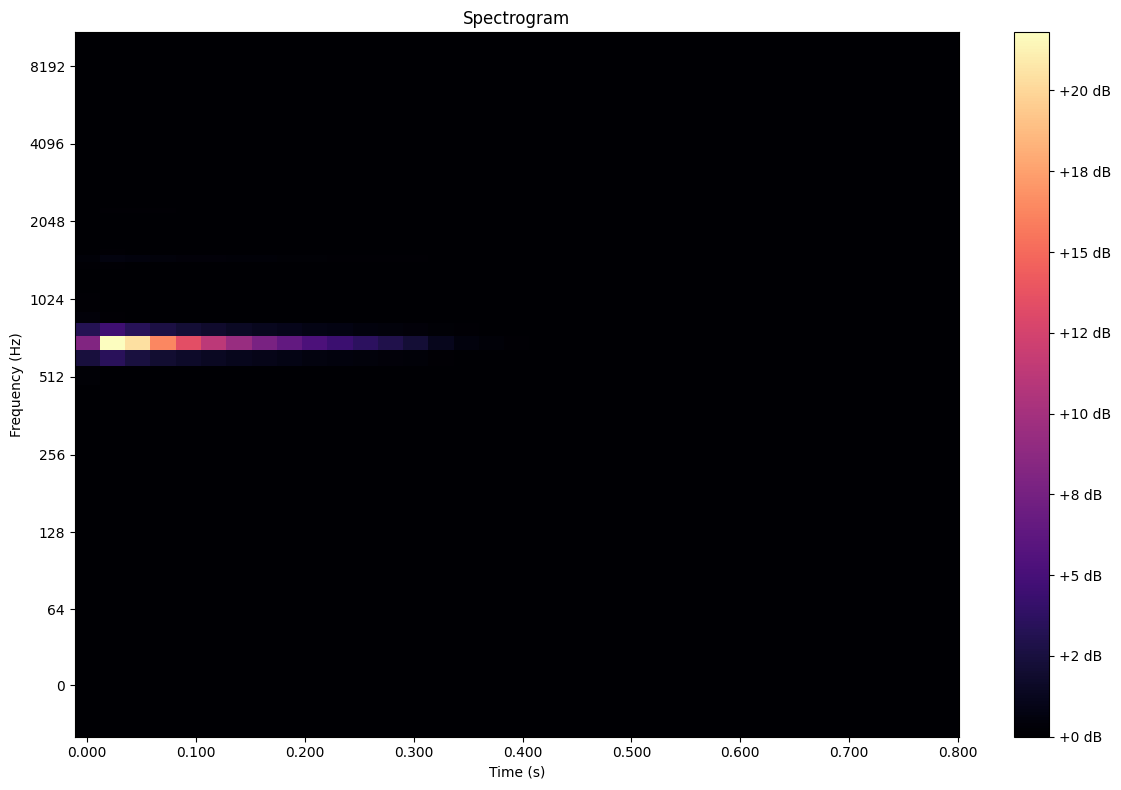

In [29]:

# Load audio file
audio_file = "../data/MonoDataset/Notes/Electric Piano 1/A#4.wav"
y, sr = librosa.load(audio_file)
# Extract some features (e.g., MFCCs)
melsp = librosa.feature.melspectrogram(y=y, sr=sr)
print(melsp.shape)

# Compute mel frequency values
mel_frequencies = librosa.mel_frequencies(fmin=0, fmax=sr/2)

# Create column names based on frequency bins
column_names = [f'{int(mel_frequencies[i])}_to_{int(mel_frequencies[i+1])}' for i in range(len(mel_frequencies)-1)]
column_names.append(f'{int(mel_frequencies[-1])}_to_end')
print(len(column_names))
print(column_names[-1])
print(column_names[0])
print(sr/2)
# Convert MFCCs to DataFrame
df = pd.DataFrame(melsp.T, columns=column_names)


print(df)
# Save DataFrame to CSV
csv_file = "output.csv"
df.to_csv(csv_file, index=False)

# Save DataFrame to CSV

display_spectrogram(melsp, sr)
